# Comprehensive Guide on Principal Component Analysis (PCA)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')

In this notebook, we will perform PCA on the following two features:

In [2]:
df = pd.DataFrame({"x1":[9, 7, 3, 5, 2, 2], "x2":[7, 5, 7, 6, 3, 1]})
df.head(5)

,x1,x2
0,9,7
1,7,5
2,3,7
3,5,6
4,2,3


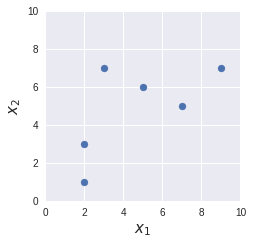

In [3]:
plt.figure(figsize=(3.5,3.5))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.scatter(df["x1"], df["x2"], label="original points", zorder=5)
plt.show()

# Standardizing our dataset

In [4]:
from sklearn.preprocessing import StandardScaler

np_data = df.to_numpy()
np_scaled_data = StandardScaler().fit_transform(np_data)
np_scaled_data

array([[ 1.65100165,  0.9883717 ],
       [ 0.88900089,  0.07602859],
       [-0.63500064,  0.9883717 ],
       [ 0.12700013,  0.53220014],
       [-1.01600102, -0.83631451],
       [-1.01600102, -1.74865762]])

In [5]:
z1 = np_scaled_data[:,0]
z2 = np_scaled_data[:,1]

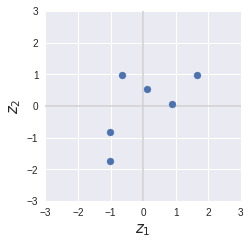

In [6]:
plt.figure(figsize=(3.5,3.5))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel("$z_2$", fontsize=15)
plt.axhline(0, color='lightgray')
plt.axvline(0, color='lightgray')
plt.scatter(z1, z2, label="original points", zorder=5)
plt.show()

In [7]:
print(z1[0])
print(z2[0])

1.6510016510024765
0.9883716976506173


# Obtaining the variance-covariance matrix

In [8]:
cov = np.cov(z1, z2, ddof=0)
cov

array([[1.        , 0.62761666],
       [0.62761666, 1.        ]])

# Computing the eigenvalues and eigenvectors of the variance-covariance matrix

In [9]:
eigen_values, eigen_vectors_matrix = np.linalg.eig(cov)
eigen_values

array([1.62761666, 0.37238334])

Here, the eigenvectors are the columns and not the rows:

In [10]:
eigen_vectors_matrix

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

We take the transpose so that we get the eigenvectors as the rows:

In [11]:
eigen_vectors = np.transpose(eigen_vectors_matrix)
eigen_vectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Verifying that the computed eigenvectors are unit vectors.

In [12]:
print(np.linalg.norm(eigen_vectors[0]))
print(np.linalg.norm(eigen_vectors[1]))

1.0
1.0


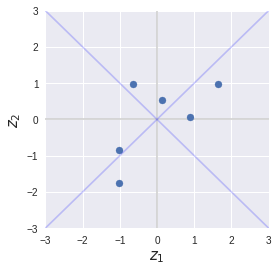

In [13]:
plt.figure(figsize=(4,4))
plt.scatter(z1, z2, label="original points", zorder=5)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel("$z_2$", fontsize=15)
plt.axhline(0, color='lightgray')
plt.axvline(0, color='lightgray')
plt.quiver([0, 0], [0, 0], eigen_vectors[0], eigen_vectors[1], angles='xy', scale_units='xy', scale=0.01, alpha=0.2, color="blue", zorder=5)
plt.quiver([0, 0], [0, 0], -eigen_vectors[0], -eigen_vectors[1], angles='xy', scale_units='xy', scale=0.01, alpha=0.2, color="blue", zorder=5)
plt.show()

# Performing projections

In [14]:
Z = np.column_stack([z1, z2])
Z

array([[ 1.65100165,  0.9883717 ],
       [ 0.88900089,  0.07602859],
       [-0.63500064,  0.9883717 ],
       [ 0.12700013,  0.53220014],
       [-1.01600102, -0.83631451],
       [-1.01600102, -1.74865762]])

In [15]:
W = np.transpose(eigen_vectors)
W

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [16]:
X_dash = np.dot(Z, W)
X_dash

array([[ 1.86631879, -0.46855013],
       [ 0.68237889, -0.57485822],
       [ 0.24987107,  1.14789758],
       [ 0.46612498,  0.28651968],
       [-1.30978487,  0.12705754],
       [-1.95490887, -0.51806645]])

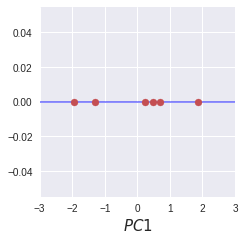

In [17]:
plt.figure(figsize=(3.5,3.5))
plt.scatter(X_dash[:,0], np.zeros_like(X_dash[:,0]), zorder=10, color='#c44e52')
plt.axhline(0, color='blue', alpha=0.5)
plt.xlim(-3,3)
plt.xlabel("$PC1$", fontsize=15)
plt.show()

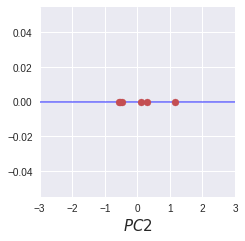

In [18]:
plt.figure(figsize=(3.5,3.5))
plt.scatter(X_dash[:,1], np.zeros_like(X_dash[:,0]), zorder=10, color='#c44e52')
plt.axhline(0, color='blue', alpha=0.5)
plt.xlim(-3,3)
plt.xlabel("$PC2$", fontsize=15)
plt.show()

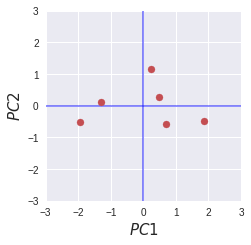

In [19]:
plt.figure(figsize=(3.5,3.5))
plt.scatter(X_dash[:,0], X_dash[:,1], zorder=10, color='#c44e52')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axhline(0, color='blue', alpha=0.5)
plt.axvline(0, color='blue', alpha=0.5)
plt.xlabel("$PC1$", fontsize=15)
plt.ylabel("$PC2$", fontsize=15)
plt.show()

In [20]:
X_dash

array([[ 1.86631879, -0.46855013],
       [ 0.68237889, -0.57485822],
       [ 0.24987107,  1.14789758],
       [ 0.46612498,  0.28651968],
       [-1.30978487,  0.12705754],
       [-1.95490887, -0.51806645]])

In [21]:
X_dash[:,0] ** 2

array([3.48314584, 0.46564095, 0.06243555, 0.2172725 , 1.71553641,
       3.82166868])

In [22]:
np.sum(X_dash[:,0] ** 2)

9.765699933750668

In [23]:
np.sum(X_dash[:,1] ** 2)

2.234300066249332

In [24]:
9.765699933750668 / (9.765699933750668 + 2.234300066249332)

0.8138083278125556

# Explained variance ratio

In [25]:
explained_variance_ratio_one = eigen_values[0] / np.sum(eigen_values)
explained_variance_ratio_two = eigen_values[1] / np.sum(eigen_values)

In [26]:
explained_variance_ratio_one

0.8138083278125557

In [27]:
explained_variance_ratio_two

0.18619167218744437

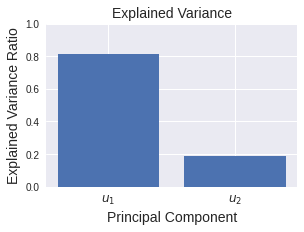

In [28]:
def plot_hisotgram(bar_labels, bar_heights, xlab="X-label", ylab="Y-label", title="Title"):
    # We need to extract the label positions (i.e. [0,1,2,..., n_bars])
    label_positions = np.arange(len(bar_labels))
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    plt.title(title, fontsize=14)
    plt.xticks(label_positions, bar_labels, fontsize=12)     # We add the label for each bar. 
    plt.ylim(0,1)
    plt.title("Explained Variance", fontsize=14)
    plt.bar(label_positions, bar_heights)
    
ratios = [explained_variance_ratio_one, explained_variance_ratio_two]
labels = ["$u_1$","$u_2$"]
plt.figure(figsize=(4.5,3))
plot_hisotgram(labels, ratios ,xlab="Principal Component", ylab="Explained Variance Ratio", title="")

# Recovering the original data points

In [29]:
recovered_full = np.dot(X_dash, np.transpose(W))
recovered_full

array([[ 1.65100165,  0.9883717 ],
       [ 0.88900089,  0.07602859],
       [-0.63500064,  0.9883717 ],
       [ 0.12700013,  0.53220014],
       [-1.01600102, -0.83631451],
       [-1.01600102, -1.74865762]])

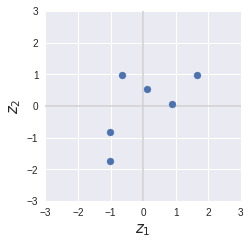

In [30]:
plt.figure(figsize=(3.5,3.5))
plt.scatter(recovered_full[:,0], recovered_full[:,1], zorder=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel('$z_2$', fontsize=15)
plt.axhline(0, color='lightgray')
plt.axvline(0, color='lightgray')
plt.show()

In [31]:
col_one = X_dash[:,0].reshape([-1,1])
col_one

array([[ 1.86631879],
       [ 0.68237889],
       [ 0.24987107],
       [ 0.46612498],
       [-1.30978487],
       [-1.95490887]])

In [32]:
recovered_partial = np.dot(col_one, np.transpose(W)[0].reshape([1,-1]))
recovered_partial

array([[ 1.31968667,  1.31968667],
       [ 0.48251474,  0.48251474],
       [ 0.17668553,  0.17668553],
       [ 0.32960014,  0.32960014],
       [-0.92615776, -0.92615776],
       [-1.38232932, -1.38232932]])

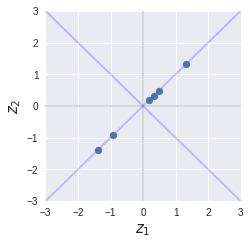

In [33]:
plt.figure(figsize=(3.5,3.5))
plt.scatter(recovered_partial[:,0], recovered_partial[:,1], zorder=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('$z_1$', fontsize=15)
plt.ylabel('$z_2$', fontsize=15)
plt.axhline(0, color='lightgray')
plt.axvline(0, color='lightgray')
plt.plot([-3, 3], [-3, 3], color='blue', linestyle='-', linewidth=2, alpha=0.2)
plt.plot([-3, 3], [3, -3], color='blue', linestyle='-', linewidth=2, alpha=0.2)
plt.show()

# Performing PCA on the Iris dataset

In [ ]:
import pandas as pd

df_raw = pd.read_csv('https://raw.githubusercontent.com/SkyTowner/sample_data/main/iris_dataset')
df_raw.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_X = df_raw.drop(columns='species')
df_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(df_X)
scaled_X[:5]   # Show the first 5 rows

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)
X_pca[:5]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [ ]:
PC1 = X_pca[:,0]
PC2 = X_pca[:,1]
df = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'label': df_raw['species']})
df.head()

,PC1,PC2,label
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


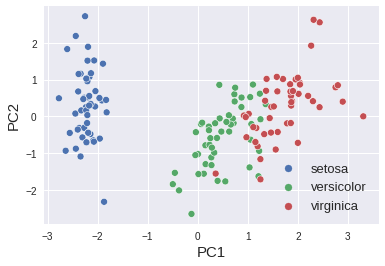

In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x="PC1", y="PC2", hue="label")
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.legend(fontsize=13, title_fontsize='40')
plt.show()

In [ ]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9580097536148197

In [ ]:
for index, component in enumerate(np.round(pca.components_, 2)):
    res = []
    for value, col_name in zip(component, df_X.columns):
        res.append(f'{value} {col_name}')
    print(f'PC{index+1}: ' + ' + '.join(res))

PC1: 0.52 sepal_length + -0.26 sepal_width + 0.58 petal_length + 0.57 petal_width
PC2: 0.37 sepal_length + 0.93 sepal_width + 0.02 petal_length + 0.07 petal_width


# Using PCA to reduce the dimensions of images

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
def show_digits(data):
    # Create a 4 by 10 subplots
    # xticks:[] and yticks:[] used to remove numbered labels
    fig, axes = plt.subplots(4, 10, figsize=(8, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), interpolation='nearest')

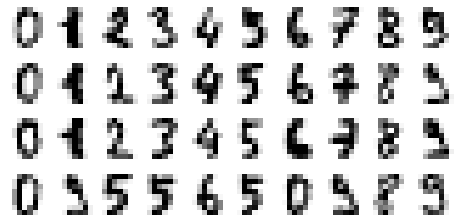

In [ ]:
show_digits(digits.data)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(digits.data)
scaled_X[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)
print(f"Reduced from {scaled_X.shape} to {X_pca.shape}")

Reduced from (1797, 64) to (1797, 2)


In [ ]:
PC1 = X_pca[:,0]
PC2 = X_pca[:,1]
df = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'label': digits.target})
df.head()

,PC1,PC2,label
0,1.914209,-0.954525,0
1,0.588991,0.924679,1
2,1.302033,-0.317249,2
3,-3.020767,-0.868721,3
4,4.528938,-1.093530,4


In [ ]:
df['label'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: label, dtype: int64

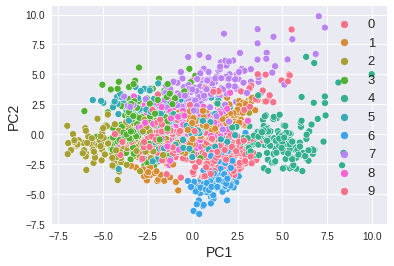

In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x="PC1", y="PC2", hue="label", palette="husl", legend='full')
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.legend(fontsize=13)
plt.show()

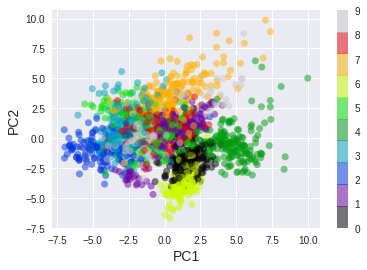

In [ ]:
plt.scatter(df['PC1'], df['PC2'],
            c=df['label'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.colorbar()
plt.show()

In [ ]:
df_raw.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
PC1.shape

(1797,)

In [ ]:
W_transpose = np.transpose(pca.components_)
W_transpose.shape

(64, 2)

In [ ]:
# X_dash = PC1.reshape([-1,1])
X_dash = df[['PC1','PC2']].to_numpy()
X_dash.shape

(1797, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(digits.data)
scaled_X[0]

pca = PCA(n_components=64)
X_pca = pca.fit_transform(scaled_X)
df = pd.DataFrame(X_pca, columns=np.arange(1,65))
df['label'] = digits.target
df.head()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,label
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,-0.184659,-0.152393,0.486203,0.009390,-0.009188,-0.027512,-0.000000e+00,0.000000e+00,8.243855e-15,0
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,0.267950,-0.511874,-0.422479,-0.090586,0.127878,-0.103101,7.089378e-16,1.992715e-16,3.086705e-17,1
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,0.067011,0.112209,0.034327,0.444446,-0.518823,0.179429,3.286993e-16,1.250280e-16,2.155553e-17,2
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,0.264125,0.018912,-0.153687,0.275277,-0.115922,0.101748,-8.117060e-17,-1.491027e-16,1.432069e-17,3
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,-0.098695,0.292078,0.157340,-0.122873,-0.084901,-0.072045,4.624149e-16,8.759085e-17,9.037551e-18,4


In [ ]:
def plot_reconstructed_digits(num_comp=1):
    X_dash = df.iloc[:,:num_comp].to_numpy()
    recovered_standardized = np.dot(X_dash, pca.components_[:num_comp])
    recovered = sc.inverse_transform(recovered_standardized)
    show_digits(recovered)

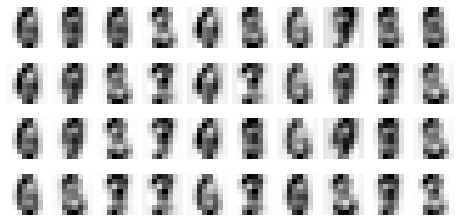

In [ ]:
plot_reconstructed_digits(2)

In [ ]:
np.sum(pca.explained_variance_ratio_[:2])

0.21594970500832816

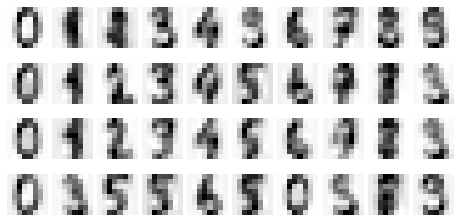

In [ ]:
plot_reconstructed_digits(10)

In [ ]:
np.sum(pca.explained_variance_ratio_[:10])

0.5887375533730299

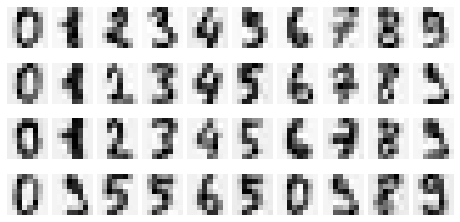

In [ ]:
plot_reconstructed_digits(40)

In [ ]:
np.sum(pca.explained_variance_ratio_[:40])

0.9507791125066465

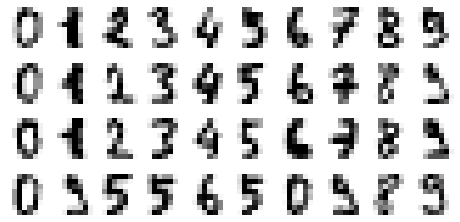

In [ ]:
plot_reconstructed_digits(64)

In [ ]:
np.sum(pca.explained_variance_ratio_[:64])

1.0000000000000002

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(digits.data)
scaled_X[0]

pca = PCA(0.8)
X_pca = pca.fit_transform(scaled_X)
df = pd.DataFrame(X_pca, columns=np.arange(1,X_pca.shape[1]+1))
df['label'] = digits.target
df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,label
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.228125,-0.195142,0.837040,0.104341,0.185323,-0.090057,0.412754,0.430517,0.450994,0
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,-0.048361,-0.392054,-0.744412,-0.214072,-0.101727,-0.422000,0.553085,-0.069676,0.909818,1
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,-0.566874,-0.995772,-1.170505,0.399017,-0.240298,-0.465223,-1.065556,-1.133454,-0.525917,2
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,-0.166579,1.008790,-0.141893,-1.000781,-0.950687,-0.400034,1.490825,0.308128,0.560421,3
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,-0.343716,-0.113469,0.732635,0.210692,-0.094411,-0.552371,1.613976,1.086368,0.495644,4


In [ ]:
np.sum(pca.explained_variance_ratio_)

0.8066173226822604

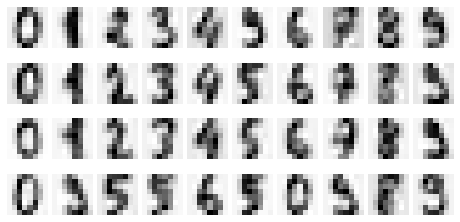

In [ ]:
plot_reconstructed_digits(num_comp=21)

# Using PCA to filter out noise

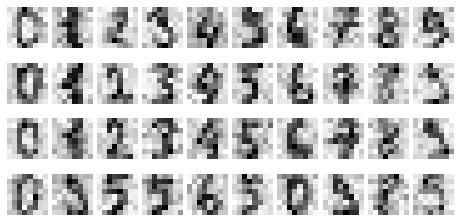

In [ ]:
np.random.seed(42)
# The value 3 is the standard deviation 
noisy = np.random.normal(digits.data, 3)
show_digits(noisy)

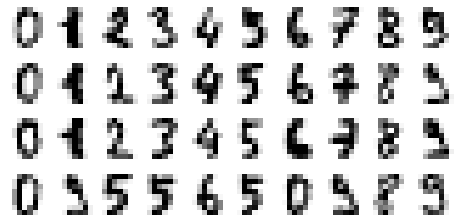

In [ ]:
show_digits(digits.data)

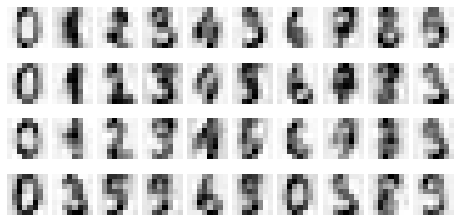

In [ ]:
sc = StandardScaler()
scaled_X = sc.fit_transform(noisy)

pca = PCA(0.4)
X_pca = pca.fit_transform(scaled_X)
num_components = X_pca.shape[1]
df = pd.DataFrame(X_pca, columns=np.arange(1,num_components+1))
df['label'] = digits.target
plot_reconstructed_digits(num_comp=num_components)

In [ ]:
num_components

10

# Using PCA to visualize the words

In [ ]:
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-50')
model

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
model['hello']

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ], dtype=float32)

In [ ]:
model['goodbye']

array([-0.1252  ,  0.91598 , -0.15958 , -0.459   ,  0.34854 , -0.26754 ,
       -0.48121 ,  0.98226 , -0.77214 ,  0.34111 , -0.4661  ,  0.5201  ,
        0.12519 ,  0.076107,  0.86048 , -0.16353 , -0.75203 ,  0.096534,
       -0.031755, -0.40957 , -0.069878,  0.86798 ,  0.09632 , -0.078638,
        1.2082  , -0.7355  , -0.73916 ,  0.51452 ,  0.48377 , -0.99767 ,
        0.961   ,  0.74651 , -0.47521 ,  1.2301  , -0.50896 , -0.27445 ,
        0.77116 , -0.82405 , -0.10124 , -0.91294 ,  0.28855 , -0.38331 ,
       -0.74    , -0.47328 ,  0.55932 , -0.12058 , -0.098498, -0.84487 ,
       -0.21067 ,  0.048563], dtype=float32)

In [ ]:
tokens = ['hello','goodbye','hey','car','vehicle','python']
word_embeddings = np.array([model[token] for token in tokens])
word_embeddings.shape

(6, 50)

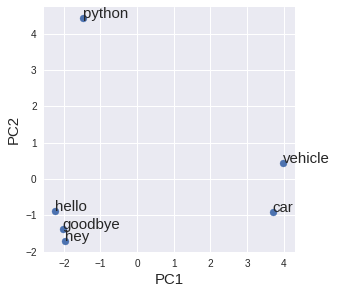

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(word_embeddings)
PC1 = result[:, 0]
PC2 = result[:, 1]
plt.figure(figsize=(4.5,4.5))
plt.scatter(PC1, PC2)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
for i, token in enumerate(tokens):
    plt.annotate(token, (PC1[i], PC2[i]), fontsize=15)

# Linear and non-linear data points

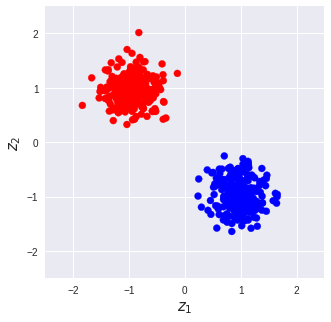

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=2, random_state=42)
plt.figure(figsize=(5,5))
sc = StandardScaler()
Z = sc.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], c=y, cmap="bwr_r")
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel("$z_2$", fontsize=15)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.show()

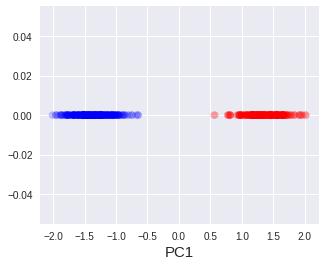

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(Z)
plt.figure(figsize=(5,4))
plt.scatter(X_pca[:,0], np.zeros_like(X_pca[:,0]), c=y, cmap="bwr_r", alpha=0.2)
plt.xlabel("PC1", fontsize=15)
plt.show()

In [ ]:
pca.components_

array([[-0.70710678,  0.70710678]])

In [ ]:
pca.explained_variance_ratio_

array([0.96544072])

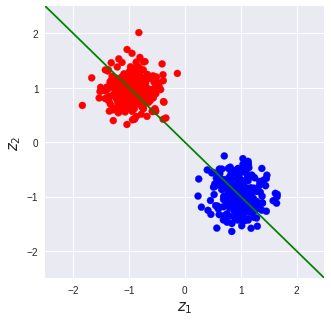

In [ ]:
xs = np.linspace(-5, 5, 100)
ys = -xs
X, y = make_blobs(n_samples=500, centers=2, random_state=42)
plt.figure(figsize=(5,5))
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel("$z_2$", fontsize=15)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.scatter(scaled_X[:,0], scaled_X[:,1], c=y, cmap="bwr_r")
plt.plot(xs, ys, color="green")
plt.show()

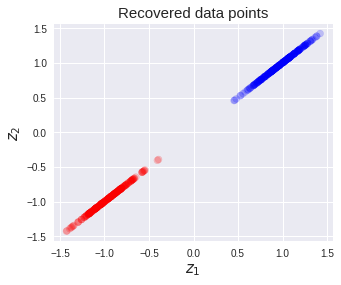

In [ ]:
recovered_standardized = np.dot(X_pca, pca.components_[:1])
plt.figure(figsize=(5,4))
plt.scatter(recovered_standardized[:,0], recovered_standardized[:,0], c=y, cmap="bwr_r", alpha=0.2)
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel("$z_2$", fontsize=15)
plt.title("Recovered data points", fontsize=15)
plt.show()

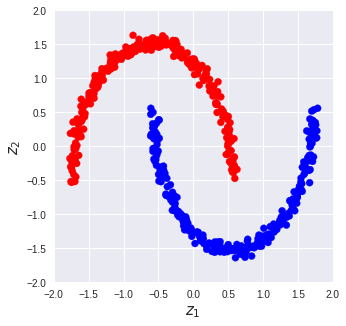

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.03, random_state=42)
plt.figure(figsize=(5,5))
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel("$z_2$", fontsize=15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.scatter(scaled_X[:,0], scaled_X[:,1], c=y, cmap="bwr_r")
plt.show()

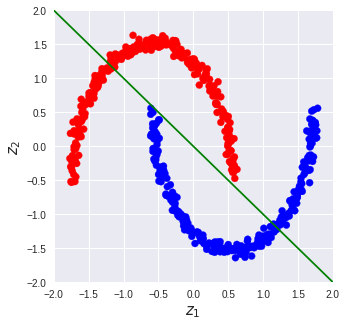

In [ ]:
xs = np.linspace(-5, 5, 100)
ys = -xs
X, y = make_moons(n_samples=500, noise=0.03, random_state=42)
plt.figure(figsize=(5,5))
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel("$z_2$", fontsize=15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(xs, ys, color="green")
plt.scatter(scaled_X[:,0], scaled_X[:,1], c=y, cmap="bwr_r")
plt.show()

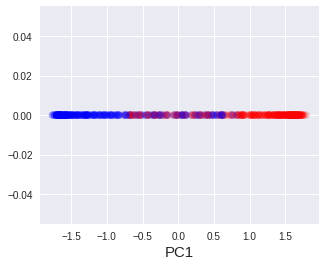

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(scaled_X)
plt.figure(figsize=(5,4))
plt.scatter(X_pca[:,0], np.zeros_like(X_pca[:,0]), c=y, cmap="bwr_r", alpha=0.2)
plt.xlabel("PC1", fontsize=15)
plt.show()

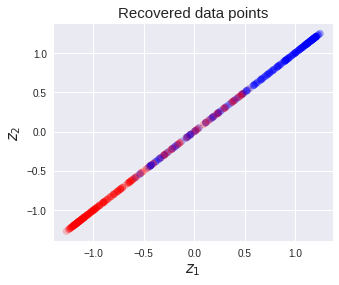

In [ ]:
recovered_standardized = np.dot(X_pca, pca.components_[:1])
plt.figure(figsize=(5,4))
plt.scatter(recovered_standardized[:,0], recovered_standardized[:,0], c=y, cmap="bwr_r", alpha=0.2)
plt.xlabel("$z_1$", fontsize=15)
plt.ylabel("$z_2$", fontsize=15)
plt.title("Recovered data points", fontsize=15)
plt.show()

In [ ]:
pca.components_

array([[-0.70710678,  0.70710678]])

In [ ]:
pca.explained_variance_ratio_

array([0.72348851])